In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
    
import lidg

In [2]:
# --- make instance ---
S0 = lidg.linear_span.LinearSpan("S0")

# --- read a text file or pandas DataFrame ---
S0.read("database/binary_alloy/alloy.dat")
S0.show()

# --- divide a target vector y ---
S0.set_y("M")

.read:  as a text file (table)
  .label_check

.show: S0 ( 8 )
  ['M', 'x', 'MA', 'ZA', 'MB', 'ZB', 'MAB', 'MBA']
    1  M
    2  x
    3  MA
    4  ZA
    5  MB
    6  ZB
    7  MAB
    8  MBA

.set_y:  
  S0.y     <---  'M'  in  S0 ( 8 )
  S0 ( 8 )   -   'M' 
  S0 ( 7 )



In [3]:
# --- remove constant and infinite descriptors  ---
S0.remove("const")
S0.remove("inf")
S0.show()

.remove:  const ['MB', 'ZB']
  S0 ( 7 )   -   S0 ( 2 )
  S0 ( 5 )

.remove:  inf []
  S0 ( 5 )   -   S0 ( 0 )
  S0 ( 5 )

.show: S0 ( 5 )
  ['x', 'MA', 'ZA', 'MAB', 'MBA']
    1  x
    2  MA
    3  ZA
    4  MAB
    5  MBA



In [4]:
# --- add a constant vector "const"---
S0.add_const()
S0.show()

# --- change descriptor labels ---
S0.change_labels("x")

.add_const:  
  S0 ( 5 )   +   const ( 1 ) 
  S0 ( 6 )

.show: S0 ( 6 )
  ['const', 'x', 'MA', 'ZA', 'MAB', 'MBA']
    1  const
    2  x
    3  MA
    4  ZA
    5  MAB
    6  MBA

.change_labels: from x0
    1   x0   <---   const
    2   x1   <---   x
    3   x2   <---   MA
    4   x3   <---   ZA
    5   x4   <---   MAB
    6   x5   <---   MBA
.save:  
  S0 ( 6 )  --->  S0_save ( 8 )
  S0 ( 6 )         S0_save ( 6 )



Ordinary Least Squares regression:
  normalize = False
  coefficients for descriptors with original scale

  e2 =  6.095027
  mse =  0.061566
  rmse =  0.248125
  R2 =  0.905313
  eq2 =  7.058569
  mseq =  0.071299
  rmseq =  0.267018
  Q2 =  0.890344

  TR2, TQ2, AIC =  0.970670,   0.966034,   16.972811

  Label        b      |b|    p_val  -log10(p)       G2      TRi2
1    x0 -0.40482  0.40482  0.00007    4.16134  0.15736  0.929844
2    x1  1.97389  1.97389  0.00000   41.27579  0.86355  0.714286
3    x2  0.52383  0.52383  0.00000   11.12227  0.39751  0.686910
4    x3  0.04031  0.04031  0.00068    3.16702  0.11729  0.922019
5    x4 -0.00390  0.00390  0.89929    0.04610  0.00017  0.490479
6    x5  0.09734  0.09734  0.00278    2.55618  0.09219  0.798256

hy = (-0.405)x0 + (1.974)x1 + (0.524)x2 + (0.04)x3 + (-0.004)x4 + (0.097)x5



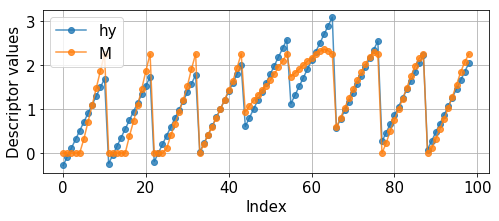

In [5]:
S0.project()
S0.plot(S0.y,S0.hy)

y_ols = S0.hy

Elastic net calculation (by sklearn)
Constant descriptors ['x0'] are ignored.


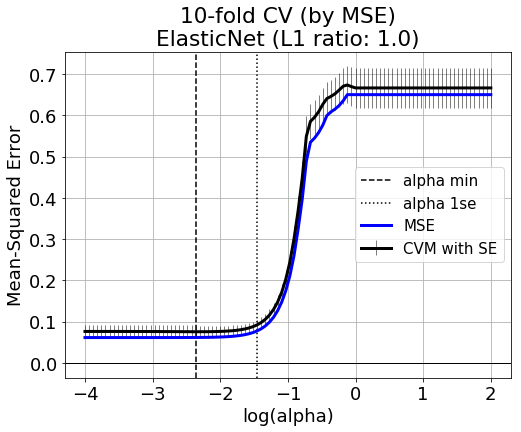

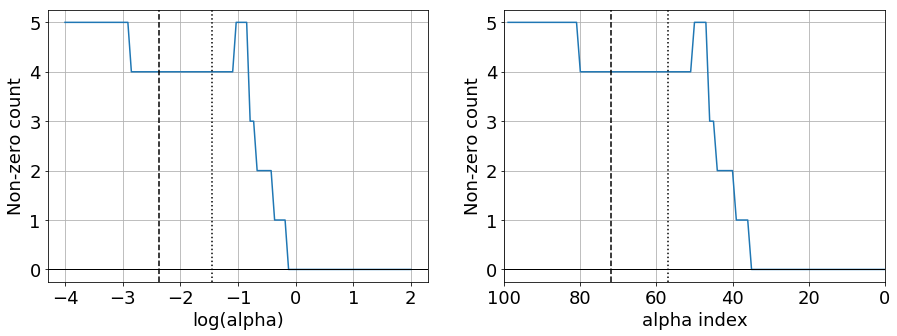

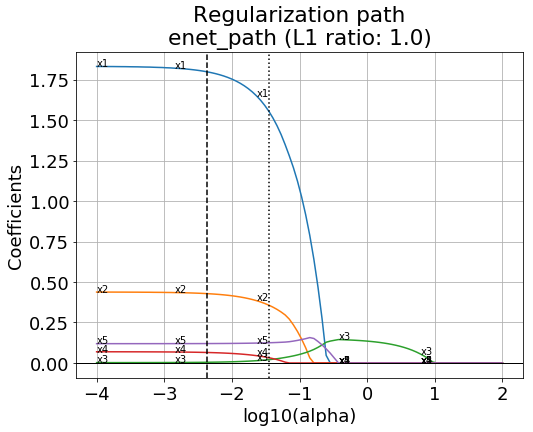

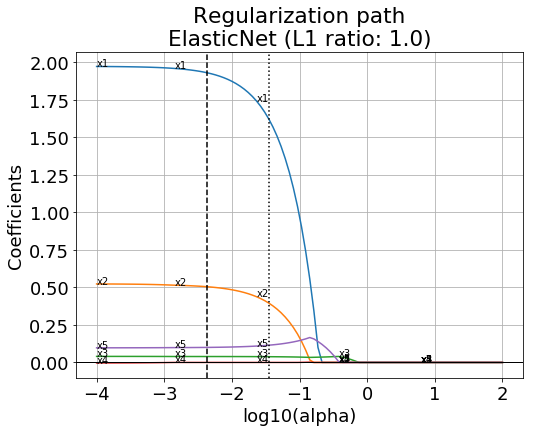

            Value
R2       0.880467
MSE      0.077721
CV mean  0.092438
CV std   0.039425

   Label         b       |b|
1  const -0.189344  0.189344
2     x1  1.622775  1.622775
3     x2  0.395654  0.395654
4     x3  0.038214  0.038214
5     x4  0.000000  0.000000
6     x5  0.114840  0.114840

yp_skl = (-0.189)const + (1.623)x1 + (0.396)x2 + (0.038)x3 + (0.115)x5



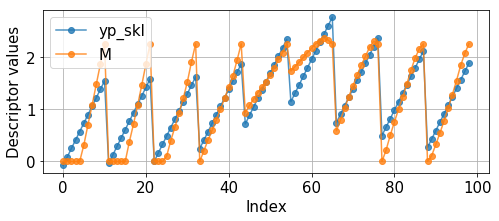

In [6]:
S0.enet()
# S0.enet(self,almax=2,almin=-4,l1r=1.0,nf=10,intercept=True)
#      "almin" and "almax" mean the range of hyperparameter alpha.
#      "l1r" = 1.0 for LASSO and  "l1r" = 0.0 for Ridge.
#      "nf" means fold number for cross validation 
S0.plot(S0.y,S0.hy)

y_lasso = S0.hy 

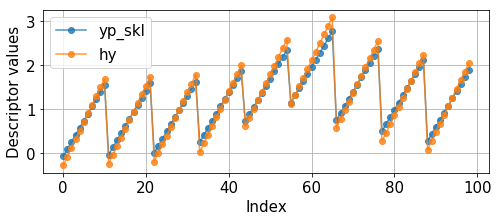

In [7]:
S0.plot(y_ols,y_lasso)